# Construct dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.random import uniform, randint
from tqdm import tqdm
import seaborn as sns
import math

# demostrate the sampling algorithm

In [2]:
# find out the distribution range of ita and chirp M for the masses 10-100

Mchirp = []
ita = []
for i in np.arange(20000):
    m1 = uniform(10,100)
    m2 = uniform(10,100)
    M = (m1*m2)**(3/5)/(m1+m2)**(1/5)
    Mchirp.append(M)
    it = (m1*m2)/(m1+m2)**2
    ita.append(it)
    
values = pd.DataFrame()
values["chirp_mass"] = Mchirp
values["ita"] = ita

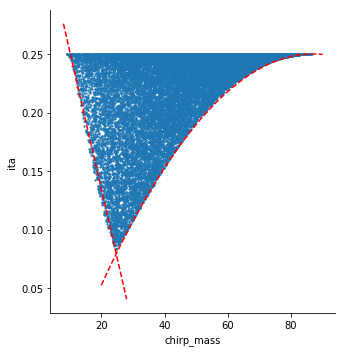

In [6]:
# Create scatterplotof dataframe
sns.lmplot('chirp_mass', 'ita', data=values, fit_reg=False, 
           scatter_kws={"s": 2})

x1 = np.linspace(20, 90, 1000)
y1 = -4.4*10**(-5)*(x1-87)**2+0.25
plt.plot(x1, y1, 'r--')

x2 = np.linspace(8, 28, 100)
y2 = 0.37-1/85*x2
plt.plot(x2, y2, 'r--')

plt.show()

# create definition to uniform sample with respect to chirp mass and ita, while restricting m1, m2 within 10-100

As shown above, the desired data are constrained in the region between the two functions.

The following definitions generate a"box" of ita and chirp mass,eliminate the ones outside the functions, and outputs the corresponding m1 and m2.

In [7]:
# Output m1, m2 from chirp mass and ita

def m1m2(chirp, it):
    M1 = (chirp/(2*it**(3/5)))*(1-(1-4*it)**(1/2))
    M2 = (chirp/(2*it**(3/5)))*(1+(1-4*it)**(1/2))
    return [M1,M2]

In [8]:
# Create the mass list with m1,m2 with in 10-100 but uniformly sampled in chirp mass and ita
# output around N+_150
# return a data frame of mass with columns as m1, m2

def mass_sample(N):
    # See range of M chirp and ita
    Mchirp = []
    ita = []
    for i in np.arange(20000):
        m1 = uniform(10,100)
        m2 = uniform(10,100)
        M = (m1*m2)**(3/5)/(m1+m2)**(1/5)
        Mchirp.append(M)
        it = (m1*m2)/(m1+m2)**2
        ita.append(it)
    
    min_M = min(Mchirp)
    max_M = max(Mchirp)
    min_ita = min(ita)
    max_ita = max(ita)
    
    # randomly generate a box with uniform pairs
    Mpair = []
    for i in np.arange(N*100/37):
        M = uniform(min_M,max_M)
        it = uniform(min_ita,max_ita)
        Mpair.append([M,it])
    pairs = pd.DataFrame(Mpair, columns = ["chirp_mass","ita"])
    
    # filter within the range for mass 10-100
    pairs1 = pairs[pairs.ita > 0.37-1/85*pairs.chirp_mass]
    pair = pairs1[pairs.ita > -4.4*10**(-5)*(pairs.chirp_mass-87)**2+0.25]
    pair = pair.reset_index(drop=True)
    
    # return the corresponding masses
    mass = []
    for i in tqdm(range(len(pair.ita))):
        add = m1m2(pair.chirp_mass[i],pair.ita[i])
        mass.append(add)
    
    mass = pd.DataFrame(mass)
    mass.columns = ['m1','m2']
    
    return mass

In [9]:
'''TEST

mass = mass_sample(7000)
print("A total of ",len(mass), " mass pairs are sampled.")

'''


'TEST\n\nmass = mass_sample(7000)\nprint("A total of ",len(mass), " mass pairs are sampled.")\n\n'